# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

# Import Listings Data

In [2]:
fpath_listings_detailed = '../SanDiego/listings_detailed.csv'

list_df = pd.read_csv(fpath_listings_detailed)
print list_df.shape
list_df.head()

(6608, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11204286,https://www.airbnb.com/rooms/11204286,20160706203047,2016-07-07,Family friendly/California king,"Aquatica Waterpark, Sleep train Amphitheater, ...","Walking to Aquatica Waterpark, Sleep train Amp...","Aquatica Waterpark, Sleep train Amphitheater, ...",none,NaN,...,10.0,f,NaN,"SAN DIEGO, SAN DIEGO TOURISM MARKETING DISTRIC...",f,moderate,f,f,2,4.57
1,7972006,https://www.airbnb.com/rooms/7972006,20160706203047,2016-07-07,Welcome to Sunset Suite,Your spacious room awaiting is with a Queen Si...,NaN,Your spacious room awaiting is with a Queen Si...,none,Getting around is easy. Very close to Eastlake...,...,10.0,f,NaN,NaN,f,strict,f,f,1,0.76
2,7727710,https://www.airbnb.com/rooms/7727710,20160706203047,2016-07-07,San Diego/Eastlake. Gated community,"This is an immaculate 3 bedroom, 2 1/2 bath co...",NaN,"This is an immaculate 3 bedroom, 2 1/2 bath co...",none,NaN,...,8.0,f,NaN,NaN,f,flexible,f,f,1,0.09
3,13124681,https://www.airbnb.com/rooms/13124681,20160706203047,2016-07-07,Townhome in Eastlake,This 2 Story TownHome is close to Otay Ranch ...,"My place is good for couples, business travele...",This 2 Story TownHome is close to Otay Ranch ...,none,"Located in eastern Chula Vista, Otay Ranch is ...",...,10.0,f,NaN,NaN,f,moderate,f,f,1,3.00
4,3469225,https://www.airbnb.com/rooms/3469225,20160706203047,2016-07-07,Bedroom suite in Large new home,Hello; we are offering a private secluded bedr...,"Beautiful, quiet award-winning suburban neighb...",Hello; we are offering a private secluded bedr...,none,"The quiet serenity; near Park and lakes, beaut...",...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN


# Explore Detailed Listings Columns

In [3]:
# 95 total features/columns

# 3 features
id_info = ['id', 'scrape_id', 'last_scraped']

# 11 features
basic_info = ['name','summary','space','description','experiences_offered',
              'neighborhood_overview','notes','transit','access',
              'interaction','house_rules']

# 14 features
location_info = ['street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed',
                 'city','state','zipcode','market','smart_location','country_code','country',
                 'latitude','longitude','is_location_exact']

# 9 features
property_info = ['property_type','room_type','accommodates','bathrooms','bedrooms',
                 'beds','bed_type','amenities','square_feet']

# 18 features
host_info = ['host_id','host_url','host_name','host_since','host_location','host_about',
             'host_response_time','host_response_rate','host_acceptance_rate',
             'host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood',
             'host_listings_count','host_total_listings_count','host_verifications',
             'host_has_profile_pic','host_identity_verified']

# 7 features
price_info = ['price','weekly_price','monthly_price','security_deposit',
              'cleaning_fee','guests_included','extra_people']

# 7 features
calendar_info = ['calendar_updated','has_availability','availability_30','availability_60',
                 'availability_90','availability_365','calendar_last_scraped']

# 11 features
review_info = ['number_of_reviews','first_review','last_review','review_scores_rating',
               'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
               'review_scores_communication','review_scores_location','review_scores_value',
               'reviews_per_month']
# 10 features
booking_info = ['minimum_nights','maximum_nights','requires_license','license',
                'jurisdiction_names','instant_bookable','cancellation_policy',
                'require_guest_profile_picture','require_guest_phone_verification',
                'calculated_host_listings_count']

# 5 features
url_info = ['listing_url','thumbnail_url','medium_url','picture_url','xl_picture_url']

total_info = id_info + basic_info + location_info + property_info + host_info + price_info + \
            calendar_info + review_info + booking_info + url_info
    
#print total_info
print len(total_info)
print [_ for _ in list(list_df.columns) if _ not in total_info]

95
[]


# Simple Model Preparation

In [4]:
def price_to_float(x):
    if isinstance(x, str):
        x = x.replace('$','')
        x = x.replace(',','')
        return float(x)
    else:
        if x is np.nan:
            return np.nan
        else:
            return float(x)

In [5]:
list_df[price_info] = list_df[price_info].applymap(price_to_float)

In [6]:
list_df[price_info].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people
0,49.0,NaN,NaN,NaN,NaN,0.0,0.0
1,59.0,NaN,NaN,5000.0,25.0,1.0,0.0
2,150.0,750.0,2600.0,NaN,NaN,1.0,0.0
3,120.0,NaN,NaN,100.0,60.0,1.0,0.0
4,70.0,500.0,NaN,NaN,NaN,1.0,15.0


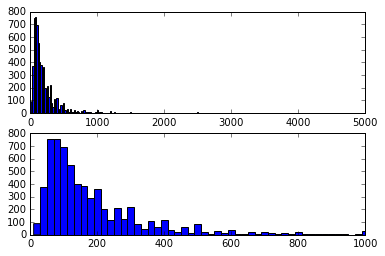

In [7]:
data = list_df['price']
b = np.arange(min(data), max(data)+20, 20)

fig,ax = plt.subplots(2,1)
ax[0].hist(data, bins=b)
ax[1].hist(data, bins=b)
ax[1].set_xlim([0,1000])
plt.show()

In [8]:
list_df[property_info].head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet
0,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Wireless Internet"",Heating,""Family/Kid Fr...",NaN
1,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN
2,Condominium,Entire home/apt,6,2.5,3.0,3.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN
3,Townhouse,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN
4,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Po...",NaN


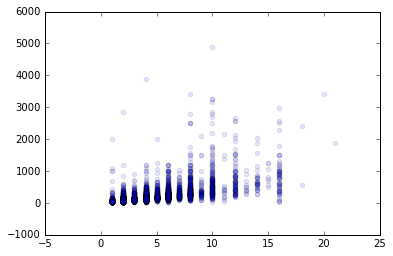

In [10]:
plt.scatter(list_df['accommodates'],list_df['price'], alpha=0.1)
plt.show()

In [11]:
def process_amenities(x):
    if isinstance(x, str):
        x = x.replace('"','')
        x = x.replace('{','')
        x = x.replace('}','')
        return x.split(',')

list_df[property_info].applymap(process_amenities)

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet
0,[House],[Private room],None,None,None,None,[Real Bed],"[TV, Wireless Internet, Heating, Family/Kid Fr...",None
1,[Condominium],[Private room],None,None,None,None,[Real Bed],"[Internet, Wireless Internet, Air Conditioning...",None
2,[Condominium],[Entire home/apt],None,None,None,None,[Real Bed],"[TV, Cable TV, Wireless Internet, Air Conditio...",None
3,[Townhouse],[Entire home/apt],None,None,None,None,[Real Bed],"[TV, Cable TV, Internet, Wireless Internet, Ki...",None
4,[House],[Private room],None,None,None,None,[Real Bed],"[TV, Cable TV, Internet, Wireless Internet, Po...",None
5,[House],[Private room],None,None,None,None,[Real Bed],"[TV, Cable TV, Internet, Wireless Internet, Po...",None
6,[House],[Private room],None,None,None,None,[Real Bed],"[TV, Internet, Wireless Internet, Pool, Kitche...",None
7,[House],[Private room],None,None,None,None,[Real Bed],"[TV, Internet, Wireless Internet, Pool, Kitche...",None
8,[House],[Private room],None,None,None,None,[Real Bed],"[TV, Internet, Wireless Internet, Air Conditio...",None
9,[House],[Entire home/apt],None,None,None,None,[Real Bed],"[TV, Cable TV, Internet, Wireless Internet, Ki...",None


# Location Data

In [12]:
list_df[location_info].head()

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact
0,"Vista Santo Tomas, San Diego, CA 92154, United...",NaN,Amphitheater And Water Park,NaN,San Diego,CA,92154.0,San Diego,"San Diego, CA",US,United States,32.581882,-117.001940,t
1,"Brookstone Road, Chula Vista, CA 91913, United...",NaN,East Lake,NaN,Chula Vista,CA,91913.0,San Diego,"Chula Vista, CA",US,United States,32.653029,-116.976812,t
2,"Lago Ventana, Chula Vista, CA 91914, United St...",NaN,East Lake,NaN,Chula Vista,CA,91914.0,San Diego,"Chula Vista, CA",US,United States,32.661477,-116.971813,t
3,"Pinnacle Peak Drive, Chula Vista, CA 91915, Un...",NaN,Eastlake Trails,NaN,Chula Vista,CA,91915.0,San Diego,"Chula Vista, CA",US,United States,32.638694,-116.951252,t
4,"Rambling Vista Road, Chula Vista, CA 91915, Un...",NaN,Eastlake Vistas,NaN,Chula Vista,CA,91915.0,San Diego,"Chula Vista, CA",US,United States,32.638942,-116.938891,t


In [16]:
neighborhood_dict = dict(Counter(list_df['neighbourhood_cleansed']))
print len(neighborhood_dict)
neighborhood_dict

100


{'Allied Gardens': 8,
 'Alta Vista': 7,
 'Amphitheater And Water Park': 1,
 'Balboa Park': 203,
 'Bario Logan': 5,
 'Bay Ho': 34,
 'Bay Park': 83,
 'Bay Terrace': 8,
 'Bird Land': 13,
 'Carmel Mountain': 8,
 'Carmel Valley': 67,
 'Chollas View': 3,
 'City Heights East': 14,
 'City Heights West': 59,
 'Clairemont Mesa': 97,
 'College Area': 61,
 'Columbia': 16,
 'Core': 74,
 'Cortez Hill': 78,
 'Darnall': 14,
 'Del Cerro': 11,
 'Del Mar Heights': 71,
 'East Lake': 2,
 'East Village': 275,
 'Eastlake Trails': 1,
 'Eastlake Vistas': 5,
 'Egger Highlands': 2,
 'El Cerritos': 8,
 'Encanto': 13,
 'Estlake Greens': 6,
 'Gaslamp Quarter': 94,
 'Gateway': 8,
 'Grant Hill': 74,
 'Grantville': 39,
 'Horton Plaza': 2,
 'Jomacha-Lomita': 4,
 'Kearny Mesa': 17,
 'Kensington': 33,
 'La Jolla': 592,
 'La Jolla Village': 33,
 'Lake Murray': 18,
 'Lincoln Park': 1,
 'Linda Vista': 64,
 'Little Italy': 95,
 'Loma Portal': 208,
 'Lynwood Hills': 5,
 'Marina': 94,
 'Memorial': 20,
 'Midtown': 316,
 'Midtow

# Calendar Data

In [116]:
list_df[calendar_info].head()

,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped
0,2 weeks ago,NaN,25,55,85,360,2016-07-06
1,2 weeks ago,NaN,20,50,80,80,2016-07-06
2,11 months ago,NaN,0,0,0,0,2016-07-06
3,a week ago,NaN,0,27,54,329,2016-07-06
4,4 weeks ago,NaN,0,30,60,335,2016-07-06
